# 数値解析課題第11回

### 学籍番号：08B22182　氏名：平山聖輝

課題11

$$
\frac{d^2x}{dt^2} + 2\frac{dx}{dt} + 4x = 0
$$

の微分方程式を初期条件 $ x(0) = 2 $ および $ \dot{x}(0) = 0 $ の下で，2次のルンゲクッタを用いて $ x(0.1) $ および $x(0.2) $ を求めよ．ただし，刻み幅 $ h = 0.1 $ とする．

### 行列にして一階の常微分方程式にする

ベクトル
$$
\boldsymbol{x}= 
\left[\begin{array}{c}
x \\
\dot{x}
\end{array}\right]
= \left[\begin{array}{c}
x_1 \\
x_2
\end{array}\right]
$$

を用いて与えられた微分方程式を行列表記にするよう変形すると

$$
\dot{\boldsymbol{x}} = 
\left[\begin{array}{c}
\dot{x} \\
\ddot{x}
\end{array}\right]
= \left[\begin{array}{cc}
0 & 1 \\
-4 & -2
\end{array}\right]
\left[\begin{array}{c}
x_1 \\
x_2
\end{array}\right]
$$

となるからこれは $ \boldsymbol{x} $ についての一階の常微分方程式に置き換わる．ここで $ \dot{\boldsymbol{x}} = g(\boldsymbol{x}) $ と置くと

$$
\begin{align}
\boldsymbol{k}_1 &= g(t_i , \boldsymbol{x}_i) \\
\boldsymbol{k}_2 &= g(t_i + h , \boldsymbol{x}_i + h\boldsymbol{k}_1) \\
\boldsymbol{x}_{i+1} &= \boldsymbol{x}_i + \frac{h}{2}(\boldsymbol{k}_1 + \boldsymbol{k}_2)
\end{align}
$$

で更新すれば二次のルンゲクッタ法が適用でき，この求めたベクトル $ \boldsymbol{x} $ の第一成分が求めたい $x$ となる

### 与えられた初期解から高階の微分方程式を解く

In [97]:
import numpy  as np
import matplotlib.pyplot as plt
import sympy as sp
h = 0.1
t = sp.symbols('t')

$ g(\boldsymbol{x}) = A\boldsymbol{x} $ とすると $ A $ は以下．

In [24]:
A = np.array([[0,1], [-4,-2]])
display(A)

array([[ 0,  1],
       [-4, -2]])

初期解 $ \boldsymbol{x}(0) $ は $ x(0)=2, \dot{x}(0)=0 $ より以下

In [33]:
x0 = np.array([[2],[0]])
display(x0)

array([[2],
       [0]])

関数 $ g $ と２次のルンゲクッタ法を定義する．

In [47]:
#g(t,x)の定義
def g(t,x):
    return A@x
#二次のルンゲクッタ法の計算関数の定義
def RK2(g, t, x, h):
    k1 = g(t, x)
    k2 = g(t + h, x + h*k1)

    return x + (h/2)*(k1 + k2)

よって $ x(0.1) $ は一回， $ x(0.2) $ は2回ルンゲクッタ法を適用すればいいのでそれぞれ計算すると以下のようになる．

In [86]:
n = 0.2

tt = np.arange(0,n,h) #0～10で幅hの配列
xx_rk = np.empty((0,2)) #計算結果を格納する配列

x_rk = x0 #x_rkの初期化
i = 0

for ttt in tt:
    x_rk = RK2(g, ttt, x_rk, h)
    xx_rk = np.concatenate([xx_rk, x_rk.T]) #xx_rkに計算したx_rkの転置を格納
    print('x(',ttt + h, ') = ', xx_rk[i][0])
    i = i + 1

x( 0.1 ) =  1.96
x( 0.2 ) =  1.8559999999999999


よって求めるべき計算結果は以下のようになる．

$$
\begin{align}
x(0.1) = 1.96 \\
x(0.2) = 1.856
\end{align}
$$

### 解析解と比較する

解析的に解くと解は

$$
\boldsymbol{x}(t) = \boldsymbol{x}_0\exp{(At)}
$$

となる．よって解は以下．

In [115]:
AA = sp.Matrix(A)
x = (AA*t).exp() @x0
display(x)

Matrix([
[2*(2*sqrt(3) - 6*I)*exp(2*t*(-1/2 - sqrt(3)*I/2))/((-1 - sqrt(3)*I)*(3*sqrt(3) + 3*I)) + 4*sqrt(3)*I*exp(2*t*(-1/2 + sqrt(3)*I/2))/(3*(-1 + sqrt(3)*I))],
[                                      2*(2*sqrt(3) - 6*I)*exp(2*t*(-1/2 - sqrt(3)*I/2))/(3*sqrt(3) + 3*I) + 4*sqrt(3)*I*exp(2*t*(-1/2 + sqrt(3)*I/2))/3]])

これを用いて$ t $ の範囲を$ 0 $ ～ $ 10 $ として解析解と比較してみる

In [107]:
N = 10

TT = np.arange(0,N,h) #0～10で幅hの配列
XX_1 = np.empty((0,2)) #解析解用の結果を格納する配列
XX_rk = np.empty((0,2)) #計算結果を格納する配列

X_rk = x0 #x_rkの初期化

for TTT in TT:
    X_new = np.array(x.subs(t,TTT).evalf()) #解析解のtに値を代入
    X_new1 = [[complex(x).real for x in X_new.T[0]]] #解が虚数だから実部をもってくる
    XX_1 = np.concatenate([XX_1, X_new1]) #これは各行がX_iの結果になっており，各列がx_1とx_2
    
    X_rk = RK2(g, TTT, X_rk, h)
    XX_rk = np.concatenate([XX_rk, X_rk.T]) #xx_rkに計算したx_rkの転置を格納

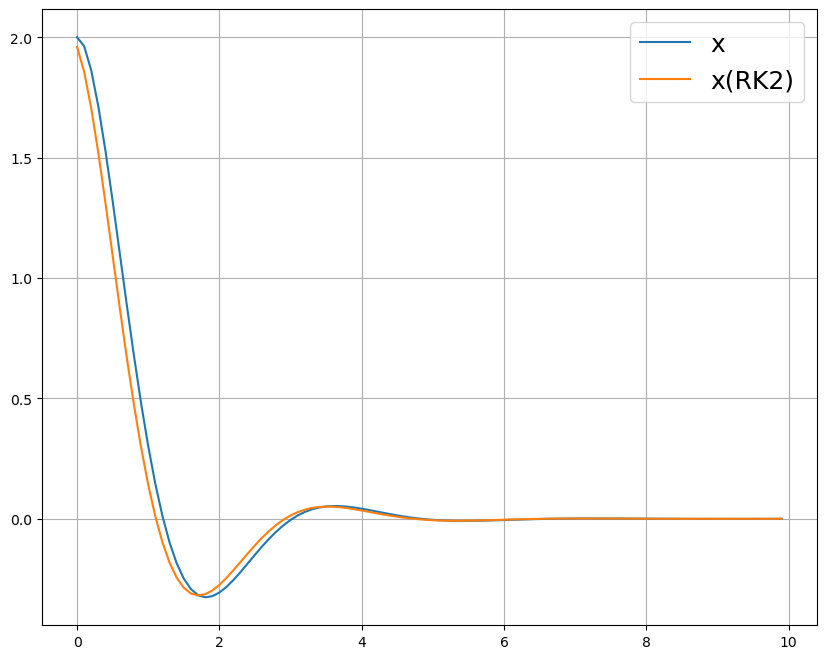

In [111]:
plt.figure(figsize = (10,8))

plt.plot(TT, XX_1[:,0], label = 'x')
plt.plot(TT, XX_rk[:,0], label = 'x(RK2)')

plt.grid()
plt.legend(fontsize = 18)
plt.show()